In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from collections import defaultdict

In [34]:
hierarchy_path = r'C:\Users\tibol\Desktop\FIIW Tibo Laperre\fase 5 - thesis\thesis-projectV3\data_local\input\datasets\ACSIncome_USA_2018_binned_imbalanced_16645\hierarchies\MAR.csv'
hierarchy_df = pd.read_csv(hierarchy_path, sep=';', decimal=',', header=None)
hierarchy_df

,0,1,2
0,Never married or under 15 years old,Spouse not present,*
1,Separated,Spouse not present,*
2,Divorced,Spouse not present,*
3,Married,Spouse present,*
4,Widowed,Spouse not present,*


In [35]:
# A recursive function to add nodes and edges to the graph
def add_nodes_edges(graph, node, hierarchy, level=0):
    if level == len(hierarchy) - 1:
        return
    for child in hierarchy[level + 1].get(node, []):
        graph.add_edge(node, child)
        add_nodes_edges(graph, child, hierarchy, level + 1)

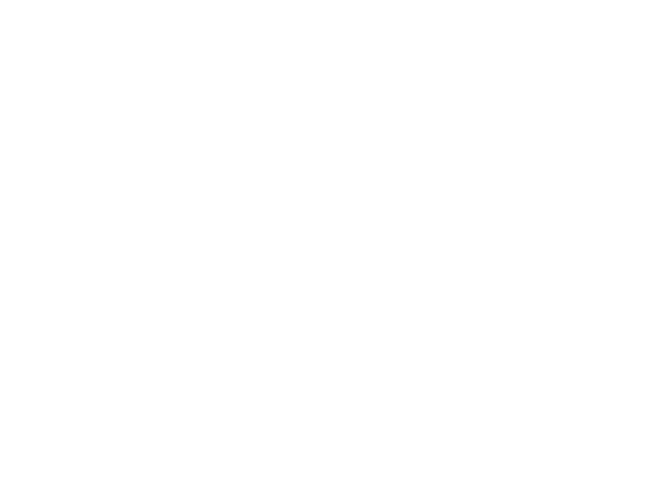

In [36]:

# Convert the DataFrame into a dictionary where keys are nodes and values are lists of child nodes
hierarchy = defaultdict(lambda: defaultdict(list))
for index, row in hierarchy_df.iterrows():
    for level in range(len(row) - 1):
        hierarchy[level][row[level]].append(row[level + 1])

# Initialize an empty directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph using the recursive function
for root in hierarchy[0]:
    add_nodes_edges(G, root, hierarchy)

# Draw the hierarchical graph with a suitable layout
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=True)

plt.show()